## Pandas Continued

Today we will cover how to handle datetime data, which you will find in lots of machining data sets. 

Datetime data can be simply just a year,month and day or it can also include hours,minutes and seconds.

Lets import this weather dataset taken from a weather station in Glasgow.

In [ ]:
import pandas as pd

df = pd.read_csv("Weather_Station_Example1.csv")
df

As you can see this doesn't look right, we have different types of data in the same column and other columns with what looks like titles.

Let's take a deeper look at the csv file.

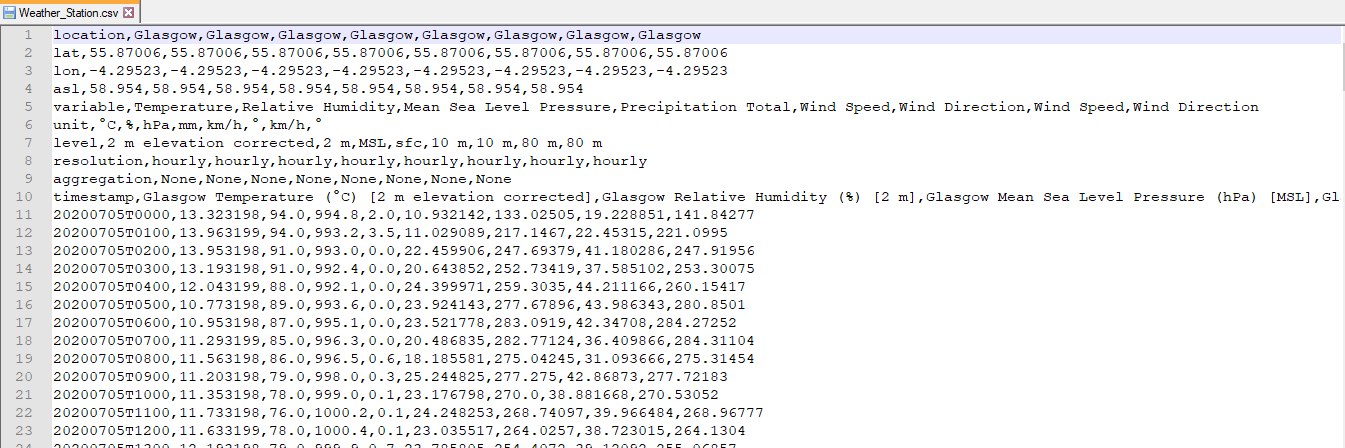

As you can see the first 9 rows look like information, this is very common when taking data from PLCs. 

These rows give you meaningful information on the dataset below, such as row 6 tells you all the units for each column. row 8 tells you the resolution/sample rate of the data. Take a look at the rest of the rows to see what information you can take from it.



Let's load in the csv file again but pass a value into the arguement called skip_rows.

In [ ]:
df = pd.read_csv("Weather_Station_Example1.csv", skiprows=9)
df

As you can see the column headings are corret as the information above it has been skipped when reading in the csv.

If you look at the timestamp column, you might figure out that this is a date and a time joined together in a string, however pandas doesn't understand that this is a datetime and sees it as a string. 

Panda has a method that allows you to convert a string like this to a datetime data type. It is called to_datetime and you pass the column where your datetime string is contain.

In [ ]:
df["timestamp"].dtype

In [ ]:
df["timestamp"] = pd.to_datetime(df["timestamp"])

Although we've passed the correct column, the method doesn't understand that this is a datetime string and we will have to pass a format string to tell it how the datetime string is organised.

The format string information can be found at this link https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes or https://strftime.org/

In [ ]:
df["timestamp"] = pd.to_datetime(df["timestamp"], format="%Y-%m-%d %H-%p")
df

As you can see the timestamp column has changed in format but it is now a datetime data type, which can be understood by pandas.

I'll show you another example of this dataset, where sometimes pandas understands the format of the string and you do not need to pass a format string.

In [ ]:
df = pd.read_csv("Weather_Station_Example2.csv", skiprows=9)
df

In [ ]:
df["timestamp"] = pd.to_datetime(df["timestamp"])
df

As you can see the to_datetime understood the format and converted it to a datetime data type without the format string.

Let's see how to do all this when loading in the data.

In [ ]:
df = pd.read_csv("Weather_Station_Example2.csv", skiprows=9, parse_dates=["timestamp"])
df

For Weather_Station_Example2.csv you simply pass a list of the columns where a datetime value is wanted, in this case it is only timestamp.

However to do the same on Weather_Station_Example1.csv, a little more work is required.

We will need to pass a function into the variable date_parser for read_csv which will convert the value in timestamp string to a datetime.

In [ ]:
def datetime_parser(datetime_string):
    return pd.datetime.strptime(datetime_string, "%Y-%m-%d %H-%p")

Let's see what happens if we do the same on Example1 without converting the strings to a datetime.

In [ ]:
df = pd.read_csv("Weather_Station_Example1.csv", skiprows=9, parse_dates=["timestamp"])
df

Now let's pass the function to date_parser.

In [ ]:
df = pd.read_csv("Weather_Station_Example1.csv", skiprows=9, parse_dates=["timestamp"], date_parser=datetime_parser)
df

As you can see it now works!

Be aware this message in orange doesn't mean it hasn't worked, it is simply saying the pd.datetime method is going to be removed from pandas at some point and we should just use the datetime from python. 

The below is the same as above but instead we have used the import datetime.

In [ ]:
import datetime

def datetime_parser_import(datetime_string):
    return datetime.datetime.strptime(datetime_string, "%Y-%m-%d %H-%p")

df = pd.read_csv("Weather_Station_Example1.csv", skiprows=9, parse_dates=["timestamp"], date_parser=datetime_parser_import)
df

As you can see we no longer get an warning message.

So why have we done all this work to convert timestamp to a datetime data type, well it give us access to more methods to make working with dates and times easier.

To access these we simply need to call the datetime class (dt) and then the method we want.

In [ ]:
df["timestamp"].dt.day_name()

In [ ]:
df["timestamp"].loc[100].day_name()

In [ ]:
df["timestamp"].dt.hour

In [ ]:
df["timestamp"].dt.dayofweek

In [ ]:
df["timestamp"].dt.year

In [ ]:
df["timestamp"].dt.month

In [ ]:
df["timestamp"].dt.is_leap_year

In [ ]:
df["timestamp"].dt.days_in_month

These are just a few examples of all the methods available now we have datetime data.

Let's create a new column which tells us the name of the day.

In [ ]:
df["Day Of The Week"] = df["timestamp"].dt.day_name()
df

As we have spoken about previously an index should be values which are unique and the timestamp would be the perfect index for this datatset.

In [ ]:
df.set_index("timestamp", inplace=True)
df

Now we can filter this dateset on the index using date, which is very similar to the list slicing we have seen previously.

In [ ]:
df["2020-07-05":"2020-07-07"]

In [ ]:
df["2020-07"]

In [ ]:
df["2020"]

In [ ]:
df["2020-07-05 00":"2020-07-05 12"]

In [ ]:
df["2020-07-12 23:00":"2020-07-15 13:00"]

As you can see we can now filter our data more easily to specific date ranges. It can show only values of that year, month, day, hour, minute and second (if we had a sample rate which was smaller than 1 hour).

Let's say you wanted to find the highest values of the day, we can find the highest value of this dataset using the .max() method but to find out for each day we will need to use the resample method.

In [ ]:
df.max()

In [ ]:
df.resample("1D").max()

As you can see we are returned a new dataframe where each row is a single day and the values are the max of that day.

We can change the resampling to multiple of days, months and years (if the data is available). The date offsets can be found here https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects

I'll show a couple of examples below.

In [ ]:
df.resample("3D").max()

In [ ]:
df.resample("W").max()

In [ ]:
df.resample("2W").max()

In [ ]:
df.resample("1M").max()

In [ ]:
df.resample("1Y").max()

As you can see the resample method can be very powerful in understanding your data. 

Let's use the agg method we have used before but only use certain methods on certain columns. Let's say we want to know the sum of Precipitation, max humidity and min temperature.

In [ ]:
df.resample("1D").agg({"Glasgow Precipitation Total (mm)":"sum","Glasgow Relative Humidity (%) [2 m]":"max","Glasgow Temperature (°C) [2 m elevation corrected]":"min"})